# Beforehand

## Presentation of the lib ?

## Pre requisites

Note that you may want to run this jupyter notebook in a virtual env !  
To do so, create your environment with virtualenv or conda, activate it, install ipykernel and add your virtual environment to the jupyter kernels.  
You should find all the necessary information here: https://janakiev.com/blog/jupyter-virtual-envs/  

Here is what I personally did:  

<details>
    <summary>Click once on <font color="blue"><b>this text</b></font> to show/hide the commands I used</summary>

```bash
    virtualenv .venv
    source .venv/bin/activate
    pip install ipykernel
    python -m ipykernel install --name=venv_prescyent
```
</details>


You should now edit and run this jupyter notebook in your browser, by running jupyter in your terminal with:  `jupyter notebook`  
Or also run jupyters notebooks directly in vscode, selecting your newly created kernel instead of the current selection in the top right corner


# Let's get started

## Install the lib and download a dataset

You should have all necessary information in the readme, and if not it's the perfect occasion to tell me !  
Here we want to install the library from pypi, and load a dataset  
Note that the pypi install of PreScyent install also all of its dependencies, including torch and cuda which can be long to install. You may want to install a custom version of torch beforehand that would still match the dependencies of PreScyent, so any torch above 2.0 (and bellow 3.0 if you are doing this tutorial from the future.)  
In that case, choose a version of pytroch for your environment here: https://pytorch.org/get-started/locally/  


The dataset we want to download is the TeleopIcub Dataset that you can find here: https://zenodo.org/records/5913573  
or directly in its .hdf5 format here https://gitlab.inria.fr/hucebot/datasets/andydata-lab-prescientteleopicub (if you have the access rights)  

If you have the original data from the zenodo website, you have to pre process it into the library's format to be able to load it and use it in the lib.  
Again, please check the readme for the instructions !  


<details>
    <summary>Click once on <font color="blue"><b>this text</b></font> to show/hide the commands I used</summary>

In the virualenv, install a specific version of torch instead of letting the library choose from its dependencies
```bash
    pip install torch --index-url https://download.pytorch.org/whl/cpu
```

Install the lib from pypi
```bash
    pip install prescyent
```

Download and prepare dataset
```bash
    wget https://zenodo.org/records/5913573/files/AndyData-lab-prescientTeleopICub.zip
    unzip AndyData-lab-prescientTeleopICub.zip -d AndyData-lab-prescientTeleopICub/
    wget https://raw.githubusercontent.com/hucebot/prescyent/refs/heads/main/dataset_preprocessing/teleopicubdataset_to_hdf5.py
    python teleopicubdataset_to_hdf5.py --data_path AndyData-lab-prescientTeleopICub/
```

</details>

## Meet the Dataset and Trajectory

Load the downloaded and processed dataset using the corresponding dataset class  


We use Config classes for our main classes such as Datasets, Predictors, Scalers, or TrainingConfig for the Predictor's trainer  
Such classes allows us to define default values and give some constraints or type hints about the possible inputs  
If you use a code editor with auto_completion you'll have default values and types indicated, you can also refer to the user documentation for each config file here:  
https://hucebot.github.io/prescyent/configuration_files.html  


Update the dataset's config and see the corresponding generated tensor pairs and plots using the functions bellow !

Teleop C:\Users\Alaix\AppData\Local\Temp\tmp41uukyhy.hdf5


Writing used trajectories in temp file hdf5: 100%|██████████| 13/13 [00:00<00:00, 455.20it/s]
prescyent.dataset : DEBUG - Tensor pairs will be generated for a LearningTypes.SEQ2SEQ learning type [C:\Users\Alaix\repositories\prescyent\prescyent\dataset\dataset.py:189]
prescyent.dataset : INFO  - Generating new datapair from 90 trajectories on disk [C:\Users\Alaix\repositories\prescyent\prescyent\dataset\hdf5_datasample.py:40]


datasample C:\Users\Alaix\AppData\Local\Temp\tmp6h9pr3dj.hdf5


Iterating over trajectories to create data pairs:   0%|          | 0/90 [00:00<?, ?it/s]

prescyent.dataset : INFO  - Train dataset has a size of 12729 [C:\Users\Alaix\repositories\prescyent\prescyent\dataset\dataset.py:203]
prescyent.dataset : INFO  - Generated (x,y) pairs with shapes (torch.Size([1, 10, 3, 3]), torch.Size([1, 10, 3, 3])) [C:\Users\Alaix\repositories\prescyent\prescyent\dataset\dataset.py:207]
prescyent.dataset : INFO  - Generating new datapair from 13 trajectories on disk [C:\Users\Alaix\repositories\prescyent\prescyent\dataset\hdf5_datasample.py:40]


datasample C:\Users\Alaix\AppData\Local\Temp\tmpbanxx1il.hdf5


Iterating over trajectories to create data pairs:   0%|          | 0/13 [00:00<?, ?it/s]

prescyent.dataset : INFO  - Val dataset has a size of 1888 [C:\Users\Alaix\repositories\prescyent\prescyent\dataset\dataset.py:222]
prescyent.dataset : INFO  - Generated (x,y) pairs with shapes (torch.Size([1, 10, 3, 3]), torch.Size([1, 10, 3, 3])) [C:\Users\Alaix\repositories\prescyent\prescyent\dataset\dataset.py:226]


#######################
TRAINING TENSOR SHAPES:
#######################
input_tensor as shapes torch.Size([256, 10, 3, 3])
output_tensor as shapes torch.Size([256, 10, 3, 3])
#######################


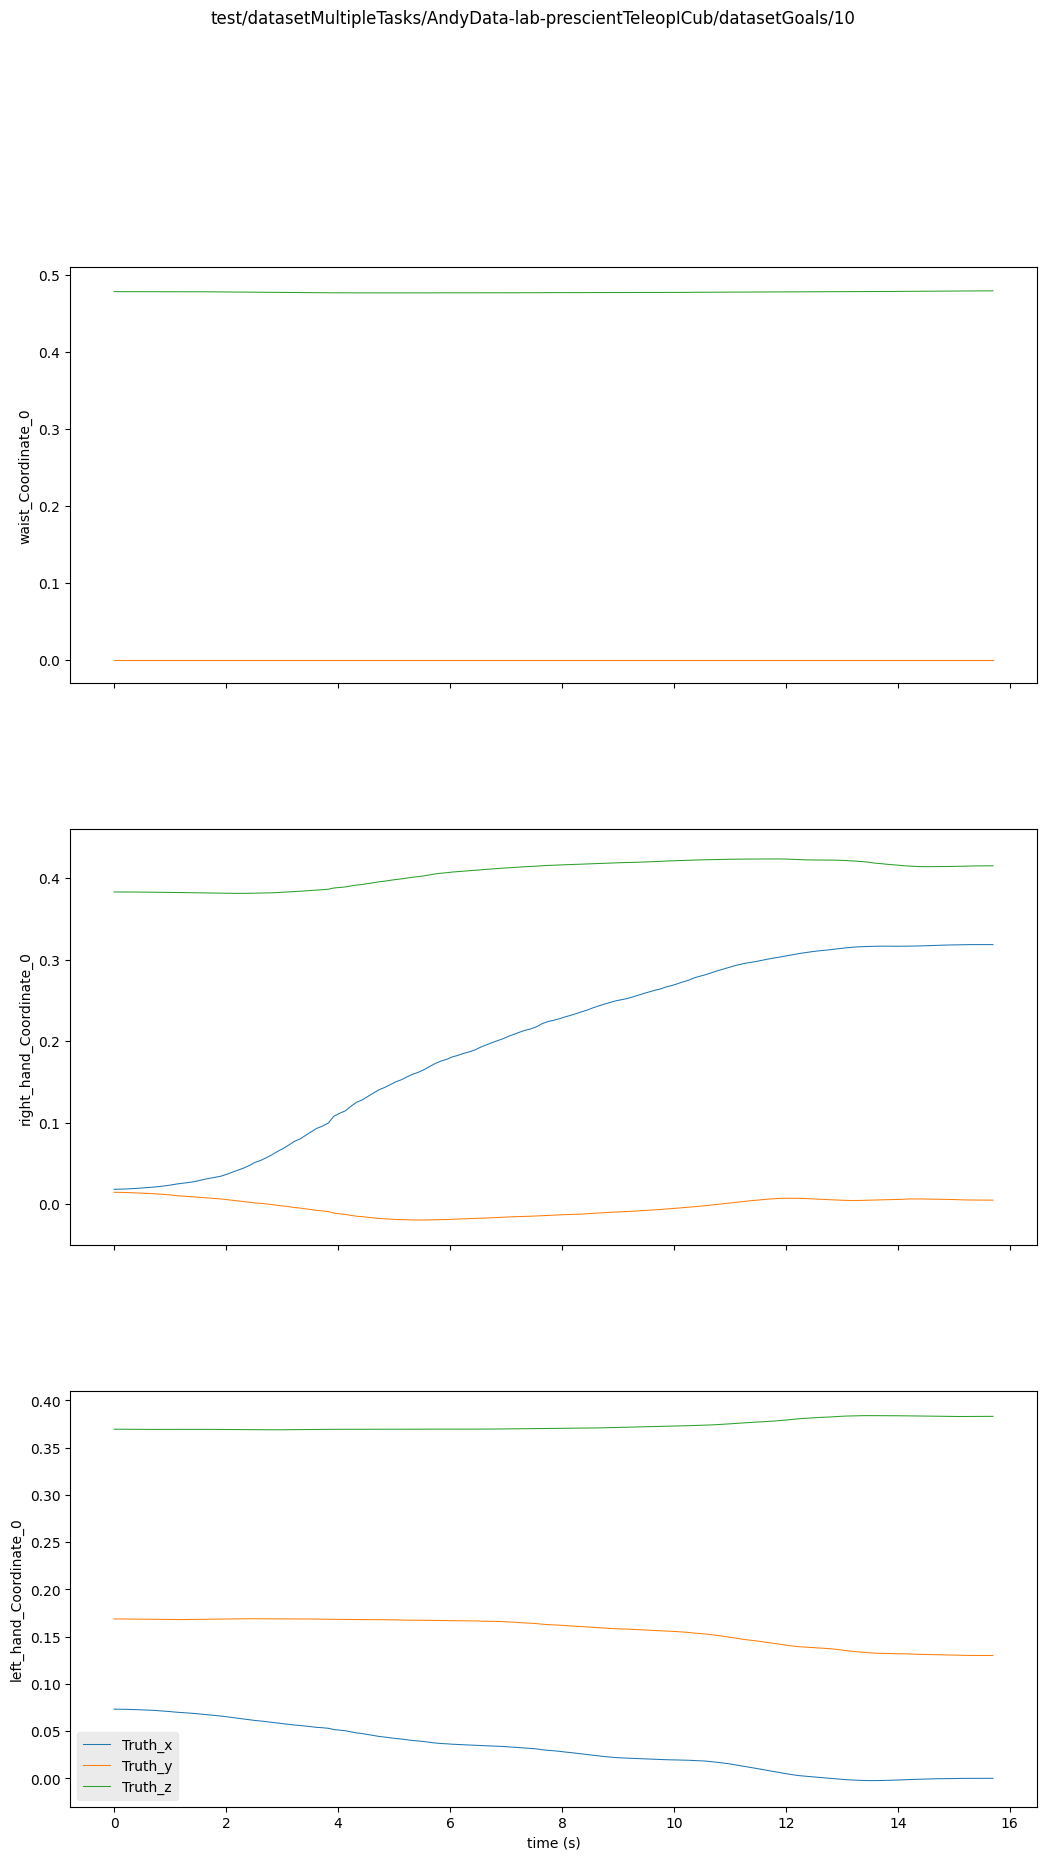

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from prescyent.dataset import TeleopIcubDataset, TeleopIcubDatasetConfig
from prescyent.evaluator.plotting import plot_trajectory_feature_wise


# You may want to update your dataset path depending on where your hdf5 file is:
HDF5_PATH = "../data/datasets/AndyData-lab-prescientTeleopICub.hdf5"

dataset_config = TeleopIcubDatasetConfig(
    hdf5_path=HDF5_PATH,
    batch_size=256,
    # Change the configuration of the dataset here !
    )
dataset = TeleopIcubDataset(dataset_config)

input_tensor, context, output_tensor = next(iter(dataset.train_dataloader()))

# Show shapes of data from the dataloaders as it'll be seen for the models
print(f"#######################")
print(f"TRAINING TENSOR SHAPES:")
print(f"#######################")
print(f"input_tensor as shapes {input_tensor.shape}")
print(f"output_tensor as shapes {output_tensor.shape}")
for context_key, context_tensor in context.items():
    print(f"context {context_key} as shapes {context_tensor.shape}")
print(f"#######################")

# Plot data from a test trajectory itself
plot_trajectory_feature_wise(dataset.trajectories.test[0])

## Test Baselines on this dataset

Now that you loaded a dataset, you want to run some predictors over it
Let's meet the predictors with a very simple baseline, such as the ConstantPredictor or DelayedPredictor
Instantiate one of theses baselines bellow and see the resulting prediction plot


In [ ]:
from prescyent.evaluator.plotting import plot_prediction_feature_wise

# import and instantiate one baseline here:

from prescyent.predictor import ConstantPredictor, PredictorConfig

baseline = ConstantPredictor(PredictorConfig(dataset_config=dataset.config))
test_traj = dataset.trajectories.test[0]


# remember that the future size if the number of predicted frames
# if you want to test a prediction at a S second future, you can use:
S = 2.5
future_size = int(S * test_traj.frequency)

# usually we set the same future_size as the dataset's config:
# future_size = dataset.config.future_size
# but you can play with this value and baselines to update the produced plot

# we create a new predicted trajectory from a given predictor, built from the last predicted frame at each timestep
baseline_traj, baseline_offset = baseline.predict_trajectory(
    test_traj, future_size=future_size
)
# subset a truth trajectory from thge original traj if needed, to compare fairly with prediction
truth_traj = test_traj.create_subtraj(
    dataset.config.out_points, dataset.config.out_features
)
title = f"{baseline}_over_{truth_traj.title}"
# plot prediction along truth

plot_prediction_feature_wise(
    truth_traj,
    baseline_traj,
    offset=baseline_offset,
)

# Notice that the predicted trajectory doesn't start at T = future_size
# Because we need to have an input of size history_size before predicting an output of size future_size
# So actually the first predicted frame is at T = history_size + future_size - 1



## Train a Predictor model and save it

Using our simplest architecture, the MlpPredictor we'll see how to train and save a ML Predictor, using high level methods based on the pytorch_lightning syntax.  

Here you'll see that each of our ML Predictors as their own specific PredictorConfig, as they allow to customize their layers and behavior.  
In addition to their config, to allow some training, you'll have to define a TrainingConfig object, again customizing the training process (number of epochs, early stopping patience, learning rate...)  

It's also the moment to introduce the enums, such as LossFunctions or LearningTypes.  
They are a standard we chose over Literals to describe a set of finite possibilities for a given config value, and define cleaner conditions based on theses values in the code instead of manipulating strings or another type.
You'll find all of them importable from `prescyent.utils.enums`.  
And more details about their values in the doc here: https://hucebot.github.io/prescyent/configuration_files.html  

Once your model is trained, or during its training, you can monitor many training metrics using using tensorboard and providing the path to the directory where the model logs (defined by its configs' `save_path` argument, which default's value is "data/models"):
`tensorboard --logdir data/models`

In [ ]:

from pathlib import Path

from prescyent.predictor import MlpPredictor, MlpConfig, TrainingConfig
from prescyent.scaler import ScalerConfig
from prescyent.utils.enums import LossFunctions, Scalers, TrajectoryDimensions, LearningTypes


# -- Configure scaler
scaler_config = ScalerConfig(
    do_feature_wise_scaling=True,
    scaler=Scalers.STANDARDIZATION,
    scaling_axis=TrajectoryDimensions.TEMPORAL,
)
# -- Init predictor
print("Initializing predictor...", end=" ")
config = MlpConfig(
    dataset_config=dataset_config,
    context_size=dataset.context_size_sum,
    scaler_config=scaler_config,  # pass the scaler config to the predictor, which owns the scaling functions
    hidden_size=128,
    num_layers=4,
    deriv_on_last_frame=True,
    loss_fn=LossFunctions.MTDLOSS,
)
predictor = MlpPredictor(config=config)
print("OK")

# Train
training_config = TrainingConfig(
    max_epochs=200,  # Maximum number of training epochs
    devices="auto",  # Chose the best available devices (see lightning documentation for more)
    accelerator="auto",  # Chose the best available accelerator (see lightning documentation for more)
    lr=0.0001,  # The learning rate
    early_stopping_patience=10,  # We'll stop the training before max_epochs if the validation loss doesn't improve for 10 epochs
)

# Scaler is also trained by the predictor's method !
predictor.train(dataset, training_config)

# Save the predictor in an explicit directory describing the settings of the experiment
xp_dir = (
    Path( "data")
    / "models"
    / f"{dataset.DATASET_NAME}"
    / f"h{dataset_config.history_size}_f{dataset_config.future_size}_{dataset.frequency}hz"
)
model_dir = xp_dir / f"{predictor.name}" / f"version_{predictor.version}"
print("Model directory:", model_dir)
predictor.save(model_dir, rm_log_path=False)


## Load a model

You can load a Predictor from disk using its static method `load_pretrained`. You must provide as argument the path to root directory of the model or directly to its config.json file.  
Also when loading a Predictor from disk, you may choose on which `torch.device` you want to load your model's weights, by passing the device as an argument to the `load_pretrained` method of AutoPredictor or Predictor.  
Remember that choosing the device is made through the `TrainingConfig.accelerator` attribute when you are creating a model from scratch.  
The AutoPredictor class allows to load or build a Predictor based on its config file. The class has to be a class from the library in order for the AutoPredictor to function and recognize it (see in the user doc how to create a new predictor and add it to the AutoPredictor class).  
It is perfect to generate an evaluation script that is agnostic to the actual class of predictor.  


Note also that we still use the same loaded dataset, but the AutoDataset class also exists for the same purpose: reloading a Dataset used from a dataset_config


In [ ]:
from prescyent.auto_predictor import AutoPredictor

loaded_predictor = MlpPredictor.load_pretrained(model_dir, device="cpu")
loaded_predictor.describe()
loaded_predictor = AutoPredictor.load_pretrained(model_dir / 'config.json', device="cpu")
loaded_predictor.describe()

# Evaluate Predictor

The metrics
We've seen qualitative evaluations with the previous work, here we'll introduce some quantitative metrics
First, we'll use the `test` method of the Predictor class to run the predictor over the whole test dataloader and return some metrics:
ADE
FDE
MPJPE
Again you can monitor the results of such test method using tensorboard

We introduce here another evaluation plot and metric: the MPJPE


In [ ]:
from prescyent.evaluator.plotting import plot_mpjpe

loaded_predictor.test(dataset)
plot_mpjpe(loaded_predictor, dataset, savefig_dir_path=model_dir / "test_plots")

# We prepare our trajectory for input if a transformation is needed
input_traj = test_traj.create_subtraj(
    dataset.config.in_points,
    dataset.config.in_features,
    dataset.config.context_keys,
)
# we create a new predicted trajectory from a given predictor
predicted_traj, pred_offset = predictor.predict_trajectory(
    input_traj, future_size=dataset_config.future_size
)
plot_prediction_feature_wise(
    truth_traj,
    predicted_traj,
    offset=pred_offset,
)

# Compare Predictors

in addition to the results you can check with tensorboard
our plot methods have a plural variant used to compared trajectories and mpjpe results
also we provide a runner method in evaluator to perform all we did upper with a list of trajectories and predictors, providing also a summary of the evaluations

In [ ]:
from prescyent.evaluator.plotting import plot_mpjpes, plot_trajectories_feature_wise
from prescyent.evaluator.runners import eval_predictors, dump_eval_summary_list


predictor_list = [loaded_predictor, baseline]

plot_mpjpes(predictors=predictor_list, dataset=dataset)
plot_trajectories_feature_wise(
    [truth_traj, predicted_traj, baseline_traj],
    [0, pred_offset, baseline_offset],
)
eval_summary_list = eval_predictors(
    predictors=predictor_list,
    trajectories=dataset.trajectories.test,
    dataset_config=dataset.config,
    future_size=None,  # will default to the future size in dataset_config
    run_method="step_every_timestamp",  # we run the predictor at each frame and retain the last predicted frame to create the predicted trajectory
    do_plotting=True,  # you may want to disable theses or update the plotting function used as it is mainly made for low dim features (like Coordinates) and not too many points to plot
    saveplot_dir_path="tests/plots",
)
dump_eval_summary_list(
    eval_summary_list, dump_dir="tests", dump_prediction=True
)


# Surcharge the library with your own uses

## Use the CustomDataset

As long as you created the Trajectories object, you can benefit from the libs sampling and methods passing your trajectories to a CustomDataset (you just won't benefit from the AutoDataset).
Note that for more permanent use of the library, you may prefer to create a new TrajectoryDataset instance with its own config class. Please check in the user documentation for more infos.

### Features and conversions

Example with a custom dataset having quaternions as trajectories that produces


In [23]:
from scipy.spatial.transform import Rotation as R
import numpy as np
import torch

from prescyent.dataset.datasets.custom_dataset import CustomDataset
from prescyent.dataset.features import Features, CoordinateXYZ, CoordinateX, RotationEuler, RotationQuat, RotationRotMat
from prescyent.dataset import Trajectories, Trajectory, TrajectoriesDatasetConfig

# create a trajectory with random quaternions and coordinates

def create_random_traj(num_frames: int):
    """x,y,z are linear here and a cosntant random rotation is generated"""
    linear_x_coordinates = torch.FloatTensor(np.linspace(0, 10, num_frames).tolist()).unsqueeze(0)
    linear_y_coordinates = torch.FloatTensor(np.linspace(0, 10, num_frames).tolist()).unsqueeze(0)
    linear_z_coordinates = torch.FloatTensor(np.linspace(0, 10, num_frames).tolist()).unsqueeze(0)
    random_quat = R.random().as_quat()
    random_quaternions = torch.FloatTensor([random_quat for _ in range(num_frames)])
    tensor = torch.cat((linear_x_coordinates, linear_y_coordinates, linear_z_coordinates)).transpose(0, 1)
    tensor = torch.cat((tensor, random_quaternions), dim=1)
    tensor = tensor.unsqueeze(1)
    return tensor

# create many and put it in Trajectories
num_traj = 10
frequency = 10
list_trajectories = []
# the features describe our tensor's last dimension, and allows feature wise distance calculus and feature conversions
features = Features([
    CoordinateXYZ(range(3)),
    RotationQuat(range(3, 7))
])
for t in range(num_traj):
    tensor = create_random_traj(100)
    trajectory = Trajectory(
        tensor=tensor,
        frequency=frequency,
        tensor_features=features,
        context={},  # we don't have additional context
        # the rest of the attributes is descriptive and used in plots
        # for example point parents is used to describe relationship between points, like draw a bone between shoulder and wrist
    )
    list_trajectories.append(trajectory)

trajectories = Trajectories(list_trajectories[:6], list_trajectories[6:8], list_trajectories[8:])
print(trajectories)

dataset_config = TrajectoriesDatasetConfig(
    num_workers=0,
    persistent_workers=False,
    pin_memory=False,
    frequency=frequency,
    history_size=frequency,
    future_size=frequency,
    in_features=Features([CoordinateX(range(1))]),
    out_features=Features([RotationRotMat(range(9))]),
    in_points=[0],
    out_points=[0],
)
dataset = CustomDataset(dataset_config, trajectories, name='example_dataset')
# create CustomDataset
# instead of a CustomDataset, you can of course directly inherit from the TrajectoryDataset class !
# in that case, its the `prepare_data` method that endorses the role of creating the .trajectories attribute

# play with features and see the shapes of the tensors

input_tensor, context, output_tensor = next(iter(dataset.train_dataloader()))

# Show shapes of data from the dataloaders as it'll be seen for the models
print(f"#######################")
print(f"TRAINING TENSOR SHAPES:")
print(f"#######################")
print(f"input_tensor as shapes {input_tensor.shape}")
print(f"output_tensor as shapes {output_tensor.shape}")
for context_key, context_tensor in context.items():
    print(f"context {context_key} as shapes {context_tensor.shape}")
print(f"#######################")
# custom feature with distance function


prescyent.dataset : DEBUG - Tensor pairs will be generated for a LearningTypes.SEQ2SEQ learning type [C:\Users\Alaix\repositories\prescyent\prescyent\dataset\dataset.py:189]
prescyent.dataset : INFO  - Generating new datapair from 6 trajectories on disk [C:\Users\Alaix\repositories\prescyent\prescyent\dataset\hdf5_datasample.py:40]


Iterating over trajectories to create data pairs:   0%|          | 0/6 [00:00<?, ?it/s]

prescyent.dataset : INFO  - Train dataset has a size of 486 [C:\Users\Alaix\repositories\prescyent\prescyent\dataset\dataset.py:203]
prescyent.dataset : INFO  - Generated (x,y) pairs with shapes (torch.Size([1, 10, 1, 1]), torch.Size([1, 10, 1, 9])) [C:\Users\Alaix\repositories\prescyent\prescyent\dataset\dataset.py:207]
prescyent.dataset : INFO  - Generating new datapair from 2 trajectories on disk [C:\Users\Alaix\repositories\prescyent\prescyent\dataset\hdf5_datasample.py:40]


Iterating over trajectories to create data pairs:   0%|          | 0/2 [00:00<?, ?it/s]

prescyent.dataset : INFO  - Val dataset has a size of 162 [C:\Users\Alaix\repositories\prescyent\prescyent\dataset\dataset.py:222]
prescyent.dataset : INFO  - Generated (x,y) pairs with shapes (torch.Size([1, 10, 1, 1]), torch.Size([1, 10, 1, 9])) [C:\Users\Alaix\repositories\prescyent\prescyent\dataset\dataset.py:226]


#######################
TRAINING TENSOR SHAPES:
#######################
input_tensor as shapes torch.Size([128, 10, 1, 1])
output_tensor as shapes torch.Size([128, 10, 1, 9])
#######################


## Implement your own model

Create a torch module with a config and inherit from the base classes to create a custom predictor benefiting from common methods.  
You can take example on the structure of a simple baseline such as the MlpPredictor.  

Train it (and save it !)  
Test it and and plot it as upper models  
How does it compare ?  


In [ ]:

from typing import Dict
import torch
from prescyent.predictor.lightning.models.sequence.predictor import SequencePredictor
from prescyent.predictor.lightning.configs.module_config import ModuleConfig
from prescyent.predictor.lightning.torch_module import BaseTorchModule
from prescyent.utils.tensor_manipulation import self_auto_batch


class NewConfig(ModuleConfig):
    """New config for a lightning predictor with a torch module"""
    # pass keys and values here that you may want to see vary in your architecture, like:
    hidden_size: int = 128
    # you can add more constraints on your config's attribute, like validators or min/max values
    # see the Pydantic library's Documentation for more information, or check some examples in our code

class NewTorchModule(BaseTorchModule):
    """New torch module inheriting from forward's decorator methods
        create it's init and forward methods as any pytorch module !
    """
    def __init__(self, config: NewConfig) -> None:
        super().__init__(config)
        # After the super().__init__(), you benefit from some infos from the config like theses:
        self.in_size = self.out_sequence_size * self.num_out_points * self.num_out_dims
        self.out_size = self.out_sequence_size * self.num_out_points * self.num_out_dims
        #
        # YOUR CODE HERE
        #

    @self_auto_batch  # <= auto batch the input, and unbatch the output if input tensor as only 3 shapes
    @BaseTorchModule.deriv_tensor  # <= allows the behaviors described by`deriv_on_last_frame` and `deriv_output`
    def forward(self, input_tensor: torch.Tensor, future_size: int=None, context: Dict[str, torch.Tensor] | None = None) -> torch.Tensor:
        if future_size is None:  # future_size is optional for seq2seq predictors ! so if you intend to index on it, use this !
            future_size = self.out_sequence_size
        #
        # YOUR CODE HERE
        #

class NewPredictor(SequencePredictor):
    """New class used to connect the config and torch module
       while inheriting from all base methods"""

    PREDICTOR_NAME = "NewPredictor"
    """unique name for this predictor"""
    module_class = NewTorchModule
    """LightningModule class used in this predictor"""
    config_class = NewConfig
    """PredictorConfig class used in this predictor"""

    def __init__(self, config: NewConfig, skip_build: bool = False):
        super().__init__(config=config, name=self.PREDICTOR_NAME, skip_build=skip_build)